## Astro 78100

Variable types:
`int()` `boolean()` `complex()` `float()`

In [6]:
##Exercise 1: Find the roots of 25x^3 + 5x^2 - x
import numpy as np
a = np.roots([25, 5, -1, 0])
print(a)

[-0.3236068  0.1236068  0.       ]


In [20]:
##Exercise 4: Write a function that given the height of a ball determines the time it takes to hit the ground. h = 1/2 g t2. Allow g to be a keyword so you can use this code on other planets.
def hitTheGround(h,g=9.81):
    if g == 0:
        return('You\'re in SPACE!!!!!!')
    else:
        t = (2*g*h)**0.5
        return t

hitTheGround(100,g=0)

"You're in SPACE!!!!!!"

## Accuracy and Precision

In [3]:
##Exercise 1: Test the machine precision of your computer!
x,eps = 1,1
while not x + eps == x:
    eps = 0.5*eps
print(2*eps)

2.220446049250313e-16


In [10]:
b = 0.1
print("{:30.20}".format(b))

        0.10000000000000000555


In [14]:
x = 1
y = 1+10**-14*2**.5
print(1e14*(y-x))
print(np.sqrt(2))

1.4210854715202004
1.4142135623730951


In [23]:
##Exercise 4.2: Write a program that finds solutions to the quadratic equation
import numpy as np
def jRoots(arr):
    a,b,c = arr[0],arr[1],arr[2]
    root1 = (-b - (b**2 - 4*a*c)**0.5)/(2*a)
    root2 = (-b + (b**2 - 4*a*c)**0.5)/(2*a)
    return [root1,root2]

def jRootsBetter(arr):
    a,b,c = arr[0],arr[1],arr[2]
    root1 = (2*c)/(-b+(b**2-4*a*c)**.5)
    root2 = (2*c)/(-b-(b**2-4*a*c)**.5)
    return [root1,root2]

arr = [0.001, 1000, 0.001]
print(f"My result is {jRoots(arr)}. The better answer is {jRootsBetter(arr)}. Numpy gives {np.roots(arr)}.")

My result is [-999999.999999, -9.999894245993346e-07]. The better answer is [-1000010.5755125057, -1.000000000001e-06]. Numpy gives [-1.e+06 -1.e-06].


In [57]:
##Exercise 4.3: Solve the average energy in a Quantum Harmonic Oscillator
%time
hf,beta = 1,0.01
n = 0
Z_sum = 0
E_sum = 0
while n < 10**7:
    En = hf*(n+0.5)
    Z_sum += np.exp(-beta*En)
    E_sum += En*np.exp(-beta*En) 
    n += 1
E_tot = (1/Z_sum)*(E_sum)
print(E_tot)

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.05 μs
100.00083333194436


In [58]:
##Exercise 4.3: Vectorized!!!!!!
%time
hf,beta = 1,0.01
n = list(range(0,10**7))
En = hf*[i+0.5 for i in n]
np.sum([np.exp([-beta*i])for i in En])**-1 * np.sum([i*np.exp([-beta*i])for i in En])

CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 2.15 μs


np.float64(100.00083333194448)

In [148]:
##Exercise 5.1
def f(x):
    return (x**4) - (2*x) + 1
def trap(a,b,n: int):
    z = (b-a)/n
    integral = z*(0.5*f(a)+0.5*f(b)+sum([f(a+k*z) for k in range(n)]))
    n2 = n*2
    z2 = (b-a)/n2
    integral2 = z2*(0.5*f(a)+0.5*f(b)+sum([f(a+k*z2) for k in range(n2)]))
    return integral, abs(integral2-integral)/15

trap(0,2,10000)


(4.400200106666668, 6.672000000011261e-06)

In [149]:
##Exercise 5.2
def simp(a,b,n: int):
    z = (b-a)/n
    integral = (z/3)*(f(a) + f(b) + 4*sum([f(a+(2*k-1)*z) for k in range((n//2)+1)]) + 2*sum([f(a + 2*k*z) for k in range(n//2)]))
    n2 = n*2
    z2 = (b-a)/n2
    integral2 = (z2/3)*(f(a) + f(b) + 4*sum([f(a+(2*k-1)*z2) for k in range((n2//2)+1)]) + 2*sum([f(a + 2*k*z2) for k in range(n2//2)]))
    return integral, abs(integral2-integral)/15
simp(0,2,10000)




(4.400400106666668, 1.333866666666239e-05)

In [150]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [152]:
def f(x):
    return x**4 - 2*x + 1

a,b,n = 0.0,2.0,3

# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)

4.4000000000000075


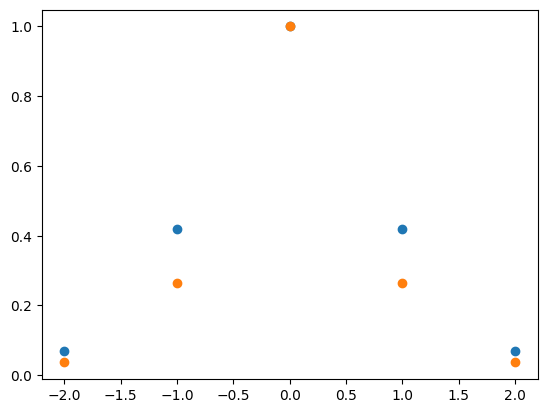

In [181]:
from math import tanh, cosh
from matplotlib import pyplot as plt
def f(x):
    return 1+0.5*tanh(2*x)

h = 10e-3
def ddx(x,f):
    return (f((x+h)/2)-f((x-h)/2))/h

x = [-2,-1,0,1,2]
y = [ddx(i,f) for i in x]

plt.scatter(x,y)
plt.scatter(x,[1/cosh(2*i) for i in x])



In [37]:
from math import exp
from matplotlib import pyplot as plt
import numpy as np
def f(x):
    return 1-exp(-c*x)

xn = [1]
sols = []

c_arr = np.linspace(0,3,30)
for i in range(20):
    c = c_arr[i]
    xn.append(f(xn[i]))
sols.append(xn[20])

sols



[0.0]

[0.033765242898423996, 0.16939530676686765, 0.38069040695840306, 0.6193095930416005, 0.8306046932331645, 0.9662347571015937]


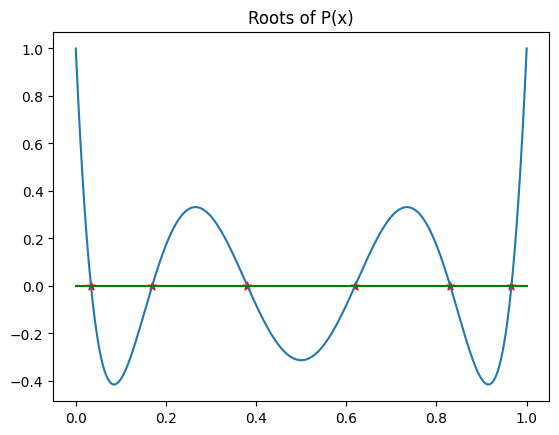

In [82]:
def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def Pp(x):
    return 6*924*x**5 - 5*2772*x**4 + 4*3150*x**3 - 3*1680*x**2 + 2*420*x**1 - 42

### Shows that the roots are ~0.0,0.2,0.4,0.6,0.8,1.0
#x= np.linspace(0,1)
#plt.plot(x,P(x))

initialGuess_array = [0,0.2,0.4,0.6,0.8,1]
sols = []
for j in initialGuess_array:
    xn = [j]
    for i in range(100):
        xn.append(xn[i]-P(xn[i])/Pp(xn[i]))
        root = xn[i]
    sols.append(root)

x= np.linspace(0,1,1000)
plt.plot(x,P(x))
plt.scatter(sols,np.zeros(len(sols)),marker='*',color='r')
plt.plot(x,0*x,color='g')
plt.title(f'Roots of P(x)')
print(sols)


In [96]:
from astropy import constants
from astropy import units as u
r=20000
(constants.G*constants.M_earth)/(r*u.meter)**2 - (constants.G*(7.348e22*u.kilogram))/(3.844e8*u.meter - r*u.meter)**2 - (2.662e-6*(u.second**-1))**2*(r*u.meter)

<Quantity 996500.99996666 m / s2>

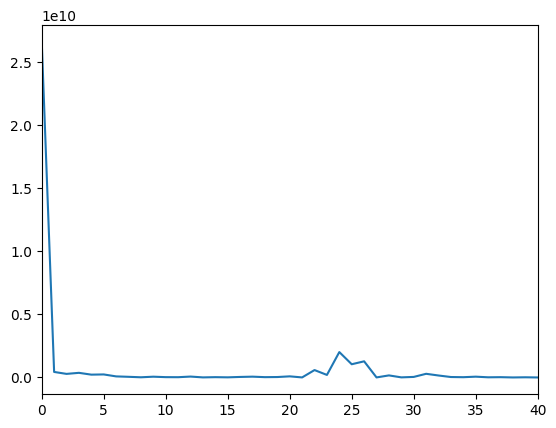

In [28]:
from numpy import zeros,loadtxt
from pylab import plot,xlim,show
from cmath import exp,pi

def dft(y):
    N = len(y)
    c = zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

y = loadtxt("sunspots.txt",float)

data = [row[1] for row in y]

c = dft(data)
plot(abs(c**2))
xlim([0,40])

show()

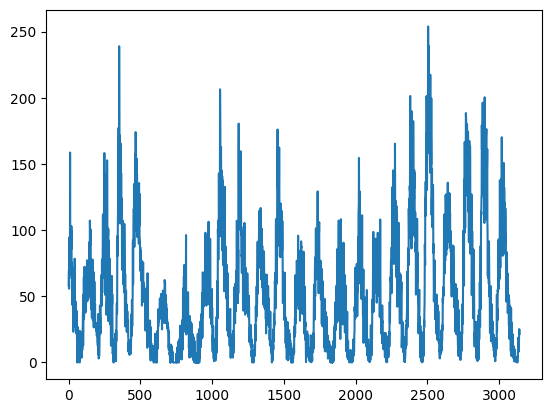

In [19]:
plot(data)